<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "used_car_price_analysis.csv")

---


# Test Environment


In [5]:
# Data Preparation
# Importing the data set
import pandas as pd

# Specify the file path
file_path = 'used_car_price_analysis.csv'

# Read the CSV file into a pandas data frame
df = pd.read_csv(file_path)

# Print the first 5 rows of the dataframe
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [6]:
# Data Preparation
# Data Cleaning
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]
print('Columns with missing values:', columns_with_missing_values)

# Replace missing values with mean of the column
for column in columns_with_missing_values:
    df[column] = df[column].fillna(df[column].mean())
    df.fillna({column: df[column].mean()}, inplace=True)
    
# Delete duplicate entries
df.drop_duplicates(inplace=True)   

Columns with missing values: Index(['tax'], dtype='object')


In [7]:
# Data Insights and Visualization
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Identify the top 5 attributes having highest correlation with Price parameter
target_attribute = 'price'
correlations = numeric_df.corr()[target_attribute].abs().sort_values(ascending=False)
top_5_attributes = correlations[1:6]
print(top_5_attributes)

year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


In [8]:
# Data Insights and Visualization
# Specify the attribute for which unique value counts are needed
specific_attribute = 'fuelType'

# Count the number of entries for each unique value of the specific attribute
value_counts = df[specific_attribute].value_counts()
print(value_counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


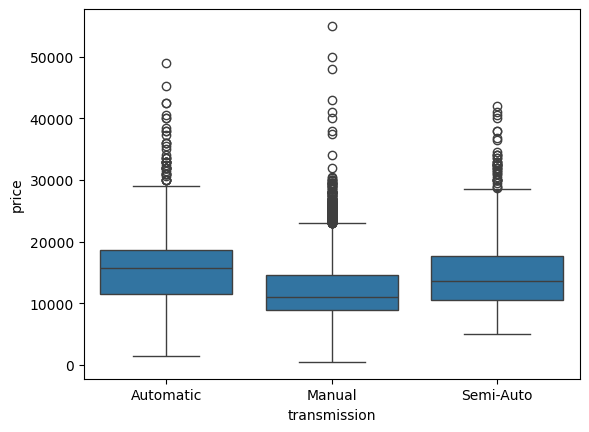

In [9]:
# Data Insights and Visualization
# Use the Seaborn library for creating the box plot.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to compare transmission types and price outliers
sns.boxplot(x='transmission', y='price', data=df)
plt.show()

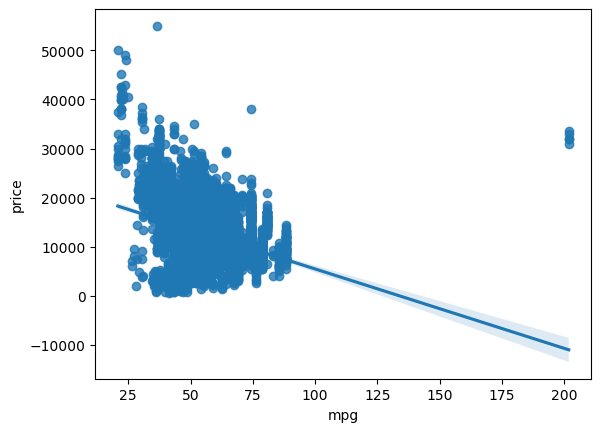

In [10]:
# Data Insights and Visualization
# Create a regression plot between a source attribute and a target attribute
sns.regplot(x='mpg', y='price', data=df)
plt.show()

In [11]:
# Model Development and Evaluation
# Linear regression in one variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target variables assuming df is the pandas data frame
X = df[['mpg']]
y = df['price']

# Initialize & train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

# Calculate MSE and R^2
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 19741690.809446193
R^2 Score: 0.1198980224962416


In [12]:
# Model Development and Evaluation
# Linear regression in multiple variables
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target variables assuming df is the pandas data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions using the trained model 
y_pred = model.predict(X)

# Calculate the mean squared error (MSE) & coefficient of determination (R^2)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 6134065.224381731
Coefficient of Determination (R^2): 0.7265379654547005


In [14]:
# Model Development and Evaluation
# Creating a Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target variables assuming df is the pandas data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create a pipeline with standard scalar, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])

# Train (Fit) the pipelineusing the source and target variables
pipeline.fit(X, y)

# Make predictions using the trained model
y_pred = pipeline.predict(X)

# Calculate the mean squared error (MSE) & coefficient of determination (R^2)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 5234038.06546274
Coefficient of Determination (R^2): 0.7666619695239302


In [15]:
# Model Development and Evaluation
# Ridge regression using training and testing data parts.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target variables assuming df is the pandas data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit (train) a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate the mean squared error (MSE) & coefficient of determination (R^2) for the Ridge Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 6912725.801054926
Coefficient of Determination (R^2): 0.6917134446113138


In [16]:
# Model Development and Evaluation
# Ridge regression & Polynomial transform using training and testing data parts.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target variables assuming df is the pandas data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit (train) a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Calculate the mean squared error (MSE) & coefficient of determination (R^2) for the Ridge Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 6912725.801054926
Coefficient of Determination (R^2): 0.6917134446113138


In [17]:
# Model Development and Evaluation
# Grid search on Ridge regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define source and target variables assuming df is the pandas data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Ridge regression model & define set of alpha values to Grid Search
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}  

# Perform Grid Search with Cross Validation
ridge_cv = GridSearchCV(ridge, parameters, cv=4)
ridge_cv.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred = ridge_cv.predict(X_test_poly)

# Calculate the mean squared error (MSE) & coefficient of determination (R^2) for the Ridge Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Mean Squared Error (MSE): 13840985.117578594
Coefficient of Determination (R^2): 0.38273414165607345


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
